In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

# LOODING THE DATASET

In [105]:
dataset=pd.read_csv('/content/housing.csv')

# To Show the Data set

In [106]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


# to show the data information, types

In [107]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


# DATA EXPLORATION

# To Check the Null Value

In [108]:
dataset.dropna(inplace=True)

In [109]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


# To split the dataset into x (for train data) and y (for test data)

In [110]:
from sklearn.model_selection import train_test_split
x=dataset.drop(['median_house_value'], axis=1)
y=dataset['median_house_value']

In [111]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND


In [112]:
y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20433, dtype: int64

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# We join x training data into y training data for analysis with basic corelation

In [114]:
train_data=x_train.join(y_train)

now we shaw the combined train data

In [115]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18245,-122.08,37.39,46,1115,248.0,543,248,3.2083,NEAR BAY,334300
19347,-122.82,38.61,41,2720,501.0,987,364,4.0294,<1H OCEAN,201700
6363,-117.98,34.13,29,2110,460.0,1890,448,3.6806,INLAND,130500
612,-122.14,37.74,52,1071,201.0,440,192,4.0662,NEAR BAY,204200
4663,-118.31,34.05,42,443,223.0,582,223,2.2937,<1H OCEAN,350000
...,...,...,...,...,...,...,...,...,...,...
6187,-117.91,34.10,35,2746,478.0,1779,501,4.2500,<1H OCEAN,166700
6108,-117.88,34.13,25,2559,654.0,1674,623,2.8547,<1H OCEAN,155600
17593,-121.91,37.30,31,2095,427.0,829,405,3.6563,<1H OCEAN,344700
2621,-124.05,40.94,14,1452,217.0,516,181,5.0329,NEAR OCEAN,165600


# Co-relation of the target value

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

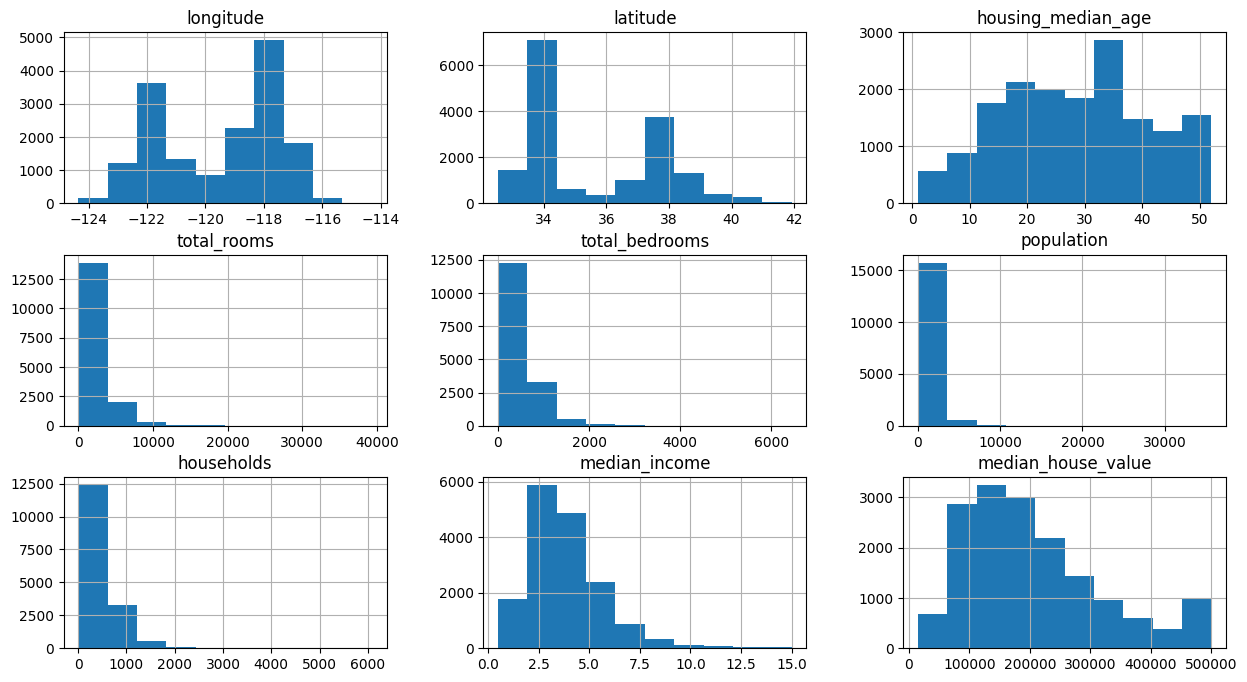

In [116]:
train_data.hist(figsize=(15,8))

# Co-relation matrix(every feature has a co-relation with each other)

Every featur has co-relation 1 with itself

In [117]:
train_data.corr()

<ipython-input-117-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925262,-0.113355,0.045294,0.071209,0.101445,0.058594,-0.013439,-0.046945
latitude,-0.925262,1.000000,0.018129,-0.036815,-0.068434,-0.109371,-0.073644,-0.082221,-0.142268
housing_median_age,-0.113355,0.018129,1.000000,-0.358665,-0.320875,-0.296950,-0.303349,-0.115568,0.107771
total_rooms,0.045294,-0.036815,-0.358665,1.000000,0.930502,0.857586,0.918770,0.200703,0.135506
total_bedrooms,0.071209,-0.068434,-0.320875,0.930502,1.000000,0.880315,0.980009,-0.005815,0.051024
population,0.101445,-0.109371,-0.296950,0.857586,0.880315,1.000000,0.909040,0.005981,-0.023366
households,0.058594,-0.073644,-0.303349,0.918770,0.980009,0.909040,1.000000,0.015906,0.065846
median_income,-0.013439,-0.082221,-0.115568,0.200703,-0.005815,0.005981,0.015906,1.000000,0.686839
median_house_value,-0.046945,-0.142268,0.107771,0.135506,0.051024,-0.023366,0.065846,0.686839,1.000000


# Create a heatmap(two dimension graphical representaton with colour) of data where the individual values that are contained ina matrix.

<ipython-input-118-9ab4983852c1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

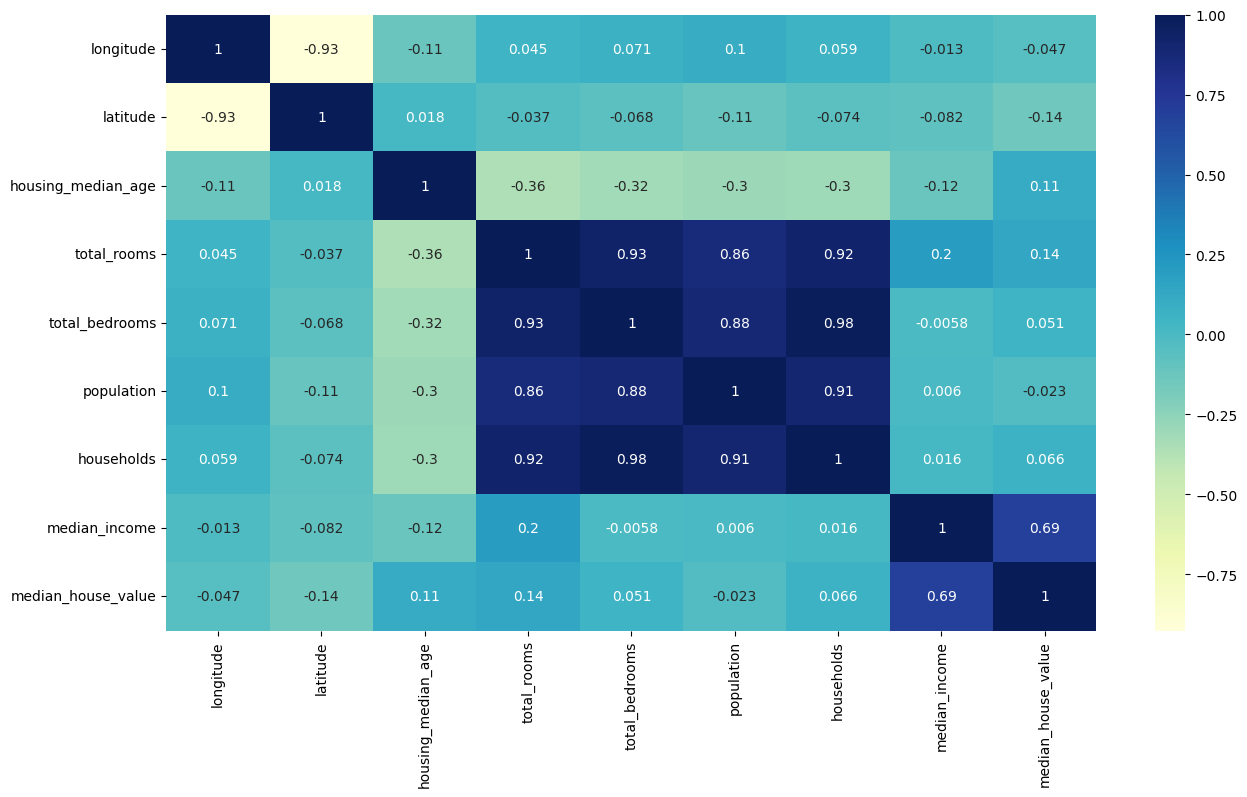

In [118]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

# DATA PROCESSING

# Logaritham of those fetures by using graph

In [119]:
train_data['total_rooms']=np.log(train_data['total_rooms'] +1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms'] +1)
train_data['population']=np.log(train_data['population'] +1)
train_data['households']=np.log(train_data['households'] +1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

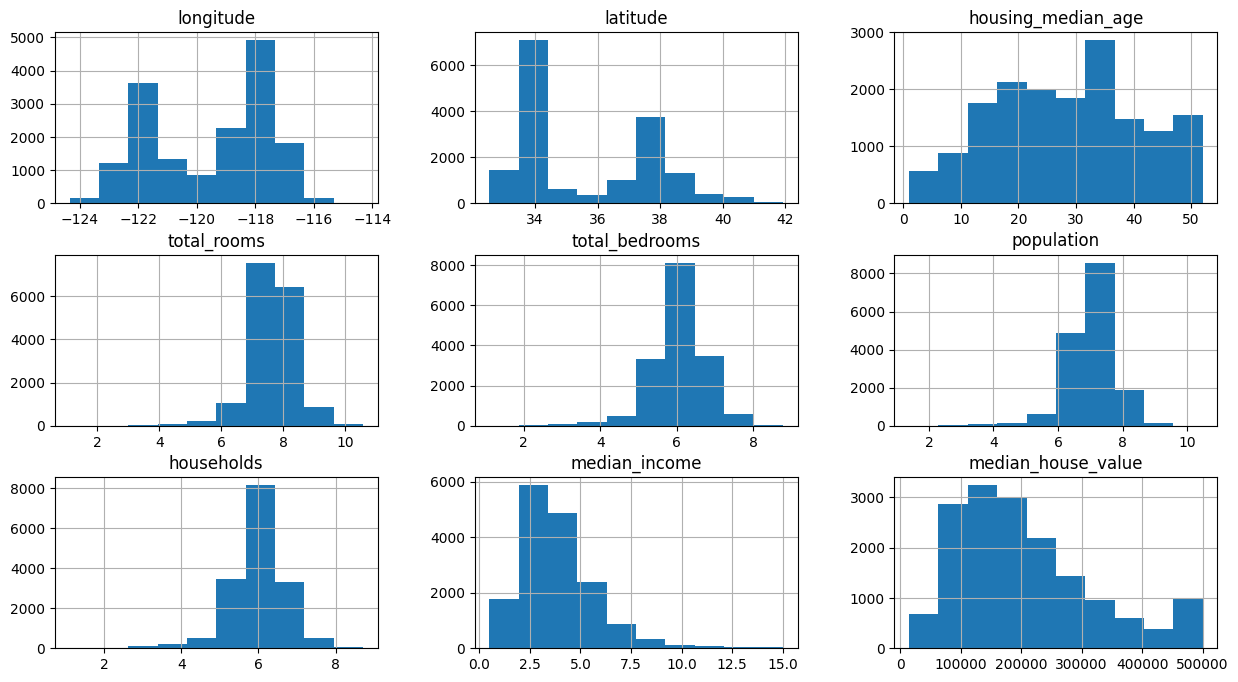

In [120]:
train_data.hist(figsize=(15,8))

To get the no of houses near by    <1H OCEAN, INLAND, NEAR OCEN & BAY, ISLAND (from the ocean_proximity coloumn)

In [121]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7263
INLAND        5147
NEAR OCEAN    2102
NEAR BAY      1830
ISLAND           4
Name: ocean_proximity, dtype: int64

We save this data into Train_data1

In [122]:
 train_data1=pd.get_dummies(train_data.ocean_proximity)

In [123]:
train_data1

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18245,0,0,0,1,0
19347,1,0,0,0,0
6363,0,1,0,0,0
612,0,0,0,1,0
4663,1,0,0,0,0
...,...,...,...,...,...
6187,1,0,0,0,0
6108,1,0,0,0,0
17593,1,0,0,0,0
2621,0,0,0,0,1


In [124]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18245,-122.08,37.39,46,7.017506,5.517453,6.298949,5.517453,3.2083,NEAR BAY,334300
19347,-122.82,38.61,41,7.908755,6.218600,6.895683,5.899897,4.0294,<1H OCEAN,201700
6363,-117.98,34.13,29,7.654917,6.133398,7.544861,6.107023,3.6806,INLAND,130500
612,-122.14,37.74,52,6.977281,5.308268,6.089045,5.262690,4.0662,NEAR BAY,204200
4663,-118.31,34.05,42,6.095825,5.411646,6.368187,5.411646,2.2937,<1H OCEAN,350000
...,...,...,...,...,...,...,...,...,...,...
6187,-117.91,34.10,35,7.918265,6.171701,7.484369,6.218600,4.2500,<1H OCEAN,166700
6108,-117.88,34.13,25,7.847763,6.484635,7.423568,6.436150,2.8547,<1H OCEAN,155600
17593,-121.91,37.30,31,7.647786,6.059123,6.721426,6.006353,3.6563,<1H OCEAN,344700
2621,-124.05,40.94,14,7.281386,5.384495,6.248043,5.204007,5.0329,NEAR OCEAN,165600


Then we join train_data with trai_data1 which is store into the train_data

In [125]:
train_data=train_data.join(train_data1)

In [126]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18245,-122.08,37.39,46,7.017506,5.517453,6.298949,5.517453,3.2083,NEAR BAY,334300,0,0,0,1,0
19347,-122.82,38.61,41,7.908755,6.218600,6.895683,5.899897,4.0294,<1H OCEAN,201700,1,0,0,0,0
6363,-117.98,34.13,29,7.654917,6.133398,7.544861,6.107023,3.6806,INLAND,130500,0,1,0,0,0
612,-122.14,37.74,52,6.977281,5.308268,6.089045,5.262690,4.0662,NEAR BAY,204200,0,0,0,1,0
4663,-118.31,34.05,42,6.095825,5.411646,6.368187,5.411646,2.2937,<1H OCEAN,350000,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6187,-117.91,34.10,35,7.918265,6.171701,7.484369,6.218600,4.2500,<1H OCEAN,166700,1,0,0,0,0
6108,-117.88,34.13,25,7.847763,6.484635,7.423568,6.436150,2.8547,<1H OCEAN,155600,1,0,0,0,0
17593,-121.91,37.30,31,7.647786,6.059123,6.721426,6.006353,3.6563,<1H OCEAN,344700,1,0,0,0,0
2621,-124.05,40.94,14,7.281386,5.384495,6.248043,5.204007,5.0329,NEAR OCEAN,165600,0,0,0,0,1


Then we drop the "ocean_proximity" because each value of "ocean_proximity" has declare separately

In [137]:
train_data=train_data.drop(['ocean_proximity'],axis=1)

In [138]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
18245,-122.08,37.39,46,7.017506,5.517453,6.298949,5.517453,3.2083,334300,0,0,0,1,0,0.786241,1.271874
19347,-122.82,38.61,41,7.908755,6.218600,6.895683,5.899897,4.0294,201700,1,0,0,0,0,0.786293,1.340490
6363,-117.98,34.13,29,7.654917,6.133398,7.544861,6.107023,3.6806,130500,0,1,0,0,0,0.801236,1.253461
612,-122.14,37.74,52,6.977281,5.308268,6.089045,5.262690,4.0662,204200,0,0,0,1,0,0.760793,1.325801
4663,-118.31,34.05,42,6.095825,5.411646,6.368187,5.411646,2.2937,350000,1,0,0,0,0,0.887763,1.126427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6187,-117.91,34.10,35,7.918265,6.171701,7.484369,6.218600,4.2500,166700,1,0,0,0,0,0.779426,1.273319
6108,-117.88,34.13,25,7.847763,6.484635,7.423568,6.436150,2.8547,155600,1,0,0,0,0,0.826304,1.219326
17593,-121.91,37.30,31,7.647786,6.059123,6.721426,6.006353,3.6563,344700,1,0,0,0,0,0.792272,1.273283
2621,-124.05,40.94,14,7.281386,5.384495,6.248043,5.204007,5.0329,165600,0,0,0,0,1,0.739488,1.399188


After that we show the heatmap of the train_data

<ipython-input-128-9ab4983852c1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

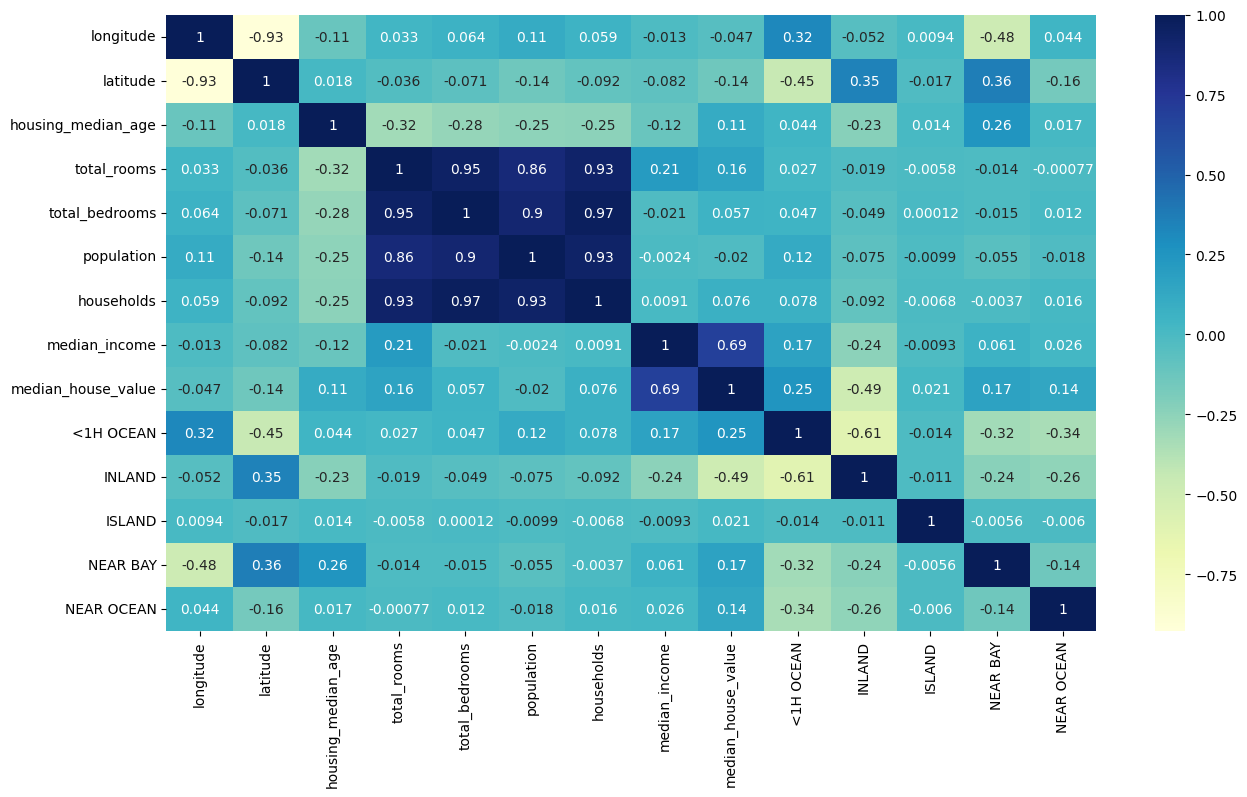

In [128]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

Visualization co-ordinate with plot function

<Axes: xlabel='latitude', ylabel='longitude'>

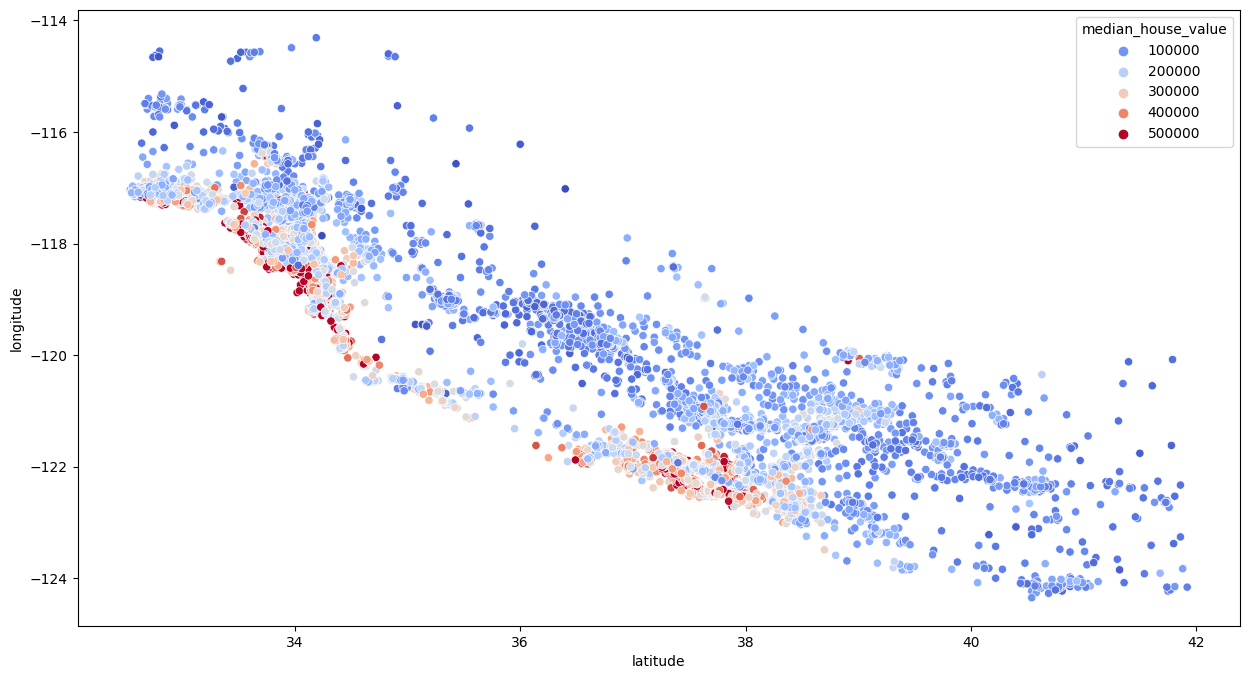

In [129]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value", palette="coolwarm")

# FEATURE ENGINEERING

We calculate the ration of bedrooms and household_rooms

In [130]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']= train_data['total_rooms']/train_data['households']

# Now we show a heatmap to show a co-relation of 'bedroom_ratio','household_rooms' with respect to 'median_house_value'

<ipython-input-131-9ab4983852c1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

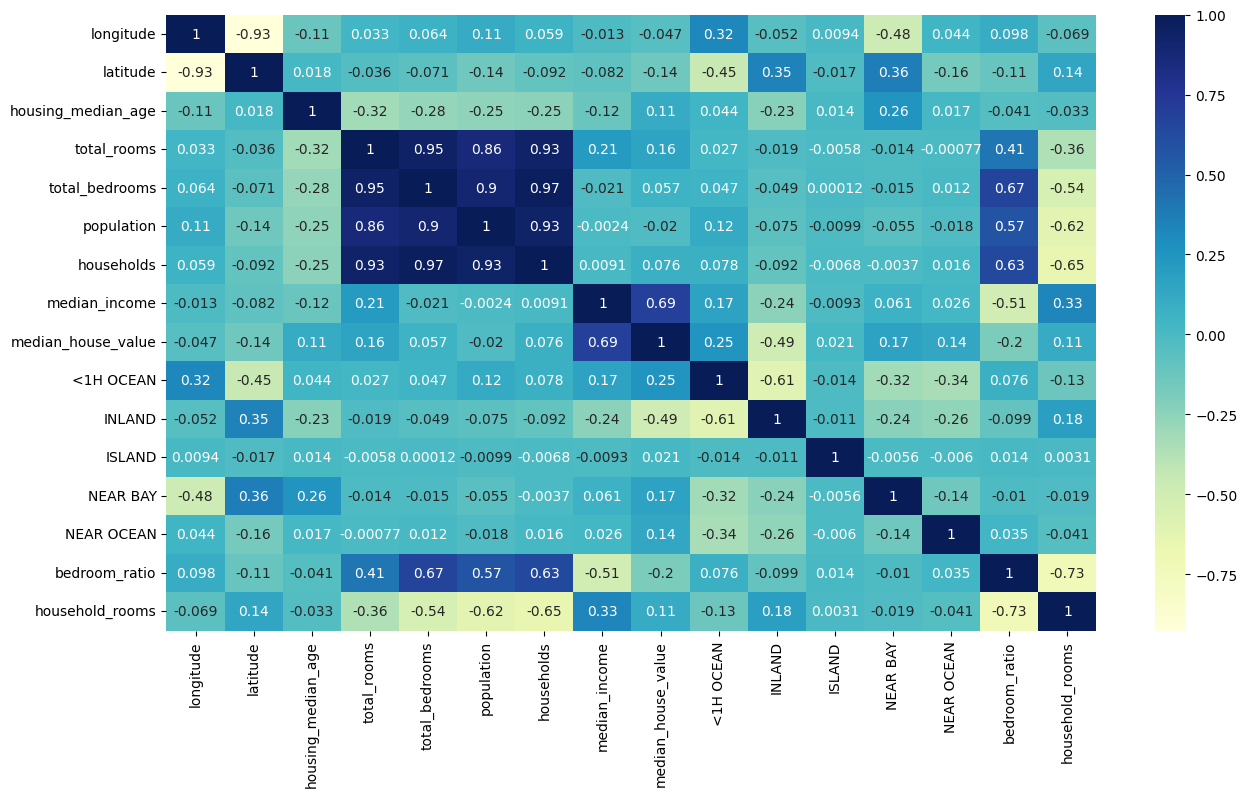

In [131]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

# LINEAR REGRATION MODEL

In [132]:
  from sklearn.linear_model import LinearRegression

In [133]:
model = linear_model.LinearRegression()

In [134]:
model

LinearRegression()

In [135]:
x_train,y_train=train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']

In [150]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()
reg.fit(x_train, y_train)



LinearRegression()

In [140]:
test_data=x_test.join(y_test)
test_data['total_rooms']=np.log(test_data['total_rooms'] +1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms'] +1)
test_data['population']=np.log(test_data['population'] +1)
test_data['households']=np.log(test_data['households'] +1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']= test_data['total_rooms']/test_data['households']

In [141]:
x_test,y_test=test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']

In [147]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
2327,-119.71,36.81,19,7.407924,5.910797,6.324359,5.872118,1.7969,0,1,0,0,0,0.797902,1.261542
16426,-121.42,38.22,35,7.318540,5.749393,6.767343,5.648974,2.0284,0,1,0,0,0,0.785593,1.295552
3094,-118.45,35.58,16,8.593599,7.075809,7.497207,6.694562,1.8819,0,1,0,0,0,0.823381,1.283669
14421,-117.23,32.80,22,8.000349,6.773080,7.468513,6.614726,2.3482,0,0,0,0,1,0.846598,1.209476
15631,-122.40,37.80,52,7.404279,6.347389,7.267525,6.242223,1.9063,0,0,0,1,0,0.857260,1.186161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11817,-121.05,38.97,12,8.209852,6.311735,7.360740,6.236370,4.8214,0,1,0,0,0,0.768800,1.316447
267,-122.19,37.77,52,7.753624,6.100319,7.043160,6.035481,3.5114,0,0,0,1,0,0.786770,1.284674
6736,-118.10,34.13,47,7.711997,5.624018,6.620073,5.564520,15.0001,1,0,0,0,0,0.729256,1.385923
18663,-121.94,37.00,32,7.701200,6.056784,6.987490,5.983936,4.1587,0,0,0,0,1,0.786473,1.286979


In [148]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
18245,-122.08,37.39,46,7.017506,5.517453,6.298949,5.517453,3.2083,0,0,0,1,0,0.786241,1.271874
19347,-122.82,38.61,41,7.908755,6.218600,6.895683,5.899897,4.0294,1,0,0,0,0,0.786293,1.340490
6363,-117.98,34.13,29,7.654917,6.133398,7.544861,6.107023,3.6806,0,1,0,0,0,0.801236,1.253461
612,-122.14,37.74,52,6.977281,5.308268,6.089045,5.262690,4.0662,0,0,0,1,0,0.760793,1.325801
4663,-118.31,34.05,42,6.095825,5.411646,6.368187,5.411646,2.2937,1,0,0,0,0,0.887763,1.126427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6187,-117.91,34.10,35,7.918265,6.171701,7.484369,6.218600,4.2500,1,0,0,0,0,0.779426,1.273319
6108,-117.88,34.13,25,7.847763,6.484635,7.423568,6.436150,2.8547,1,0,0,0,0,0.826304,1.219326
17593,-121.91,37.30,31,7.647786,6.059123,6.721426,6.006353,3.6563,1,0,0,0,0,0.792272,1.273283
2621,-124.05,40.94,14,7.281386,5.384495,6.248043,5.204007,5.0329,0,0,0,0,1,0.739488,1.399188


In [149]:
reg.score(x_test,y_test)

0.6782240713244606

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()
reg.fit(x_train_s, y_train)

LinearRegression()

In [152]:
test_data=x_test.join(y_test)
test_data['total_rooms']=np.log(test_data['total_rooms'] +1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms'] +1)
test_data['population']=np.log(test_data['population'] +1)
test_data['households']=np.log(test_data['households'] +1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']= test_data['total_rooms']/test_data['households']

AttributeError: ignored

In [153]:
x_test,y_test=test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']

In [154]:
x_test_s = scaler.transform(x_test)

In [155]:
reg.score(x_test_s,y_test)

-0.5407857077050962

# RANDOM FOREST MODEL

In [157]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [158]:
forest.score(x_test, y_test)

0.4774857816871597

# Cross validatiuon

In [159]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [160]:
forest.score(x_test_s,y_test)

0.46855162665922223

In [161]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [3,10,30],
    "max_features": [2,4,6,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [162]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [3,10,30],
    "max_features": [2,4,6,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [163]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [164]:
best_forest = grid_search.best_estimator_

In [165]:
best_forest.score(x_test_s,y_test)

0.5039987276661204